<a href="https://colab.research.google.com/github/nonolano67/2024_Geoinformatique_I/blob/main/Copie_de_S4_IP_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercice 4 - Fonction et calcul scientifique

## Numpy pour le calcul scientifique et Matplotlib

**Objectifs d'apprentissage**

* Créer de nouveaux tableaux en utilisant `linspace` et `arange`.
* Calculer des formules de base avec les tableaux `numpy`.
Charger des données à partir de fichiers `.npy` * Effectuer des réductions (par exemple `.npy`)
* Effectuer des réductions (par exemple `mean`, `std` sur les tableaux `numpy`)
* Réaliser des tracés linéaires 1D
* Réaliser des diagrammes de dispersion
* Annoter les graphiques avec des titres et des axes

Dans ce problème, nous utilisons des données réelles provenant de flotteurs de profilage océanique. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) sont des instruments robotiques autonomes qui recueillent des données sur la température, la salinité et la pression de l'océan. Les flotteurs [ARGO](http://www.argo.ucsd.edu/) recueillent un "profil" (un ensemble de mesures à différentes profondeurs ou "niveaux").

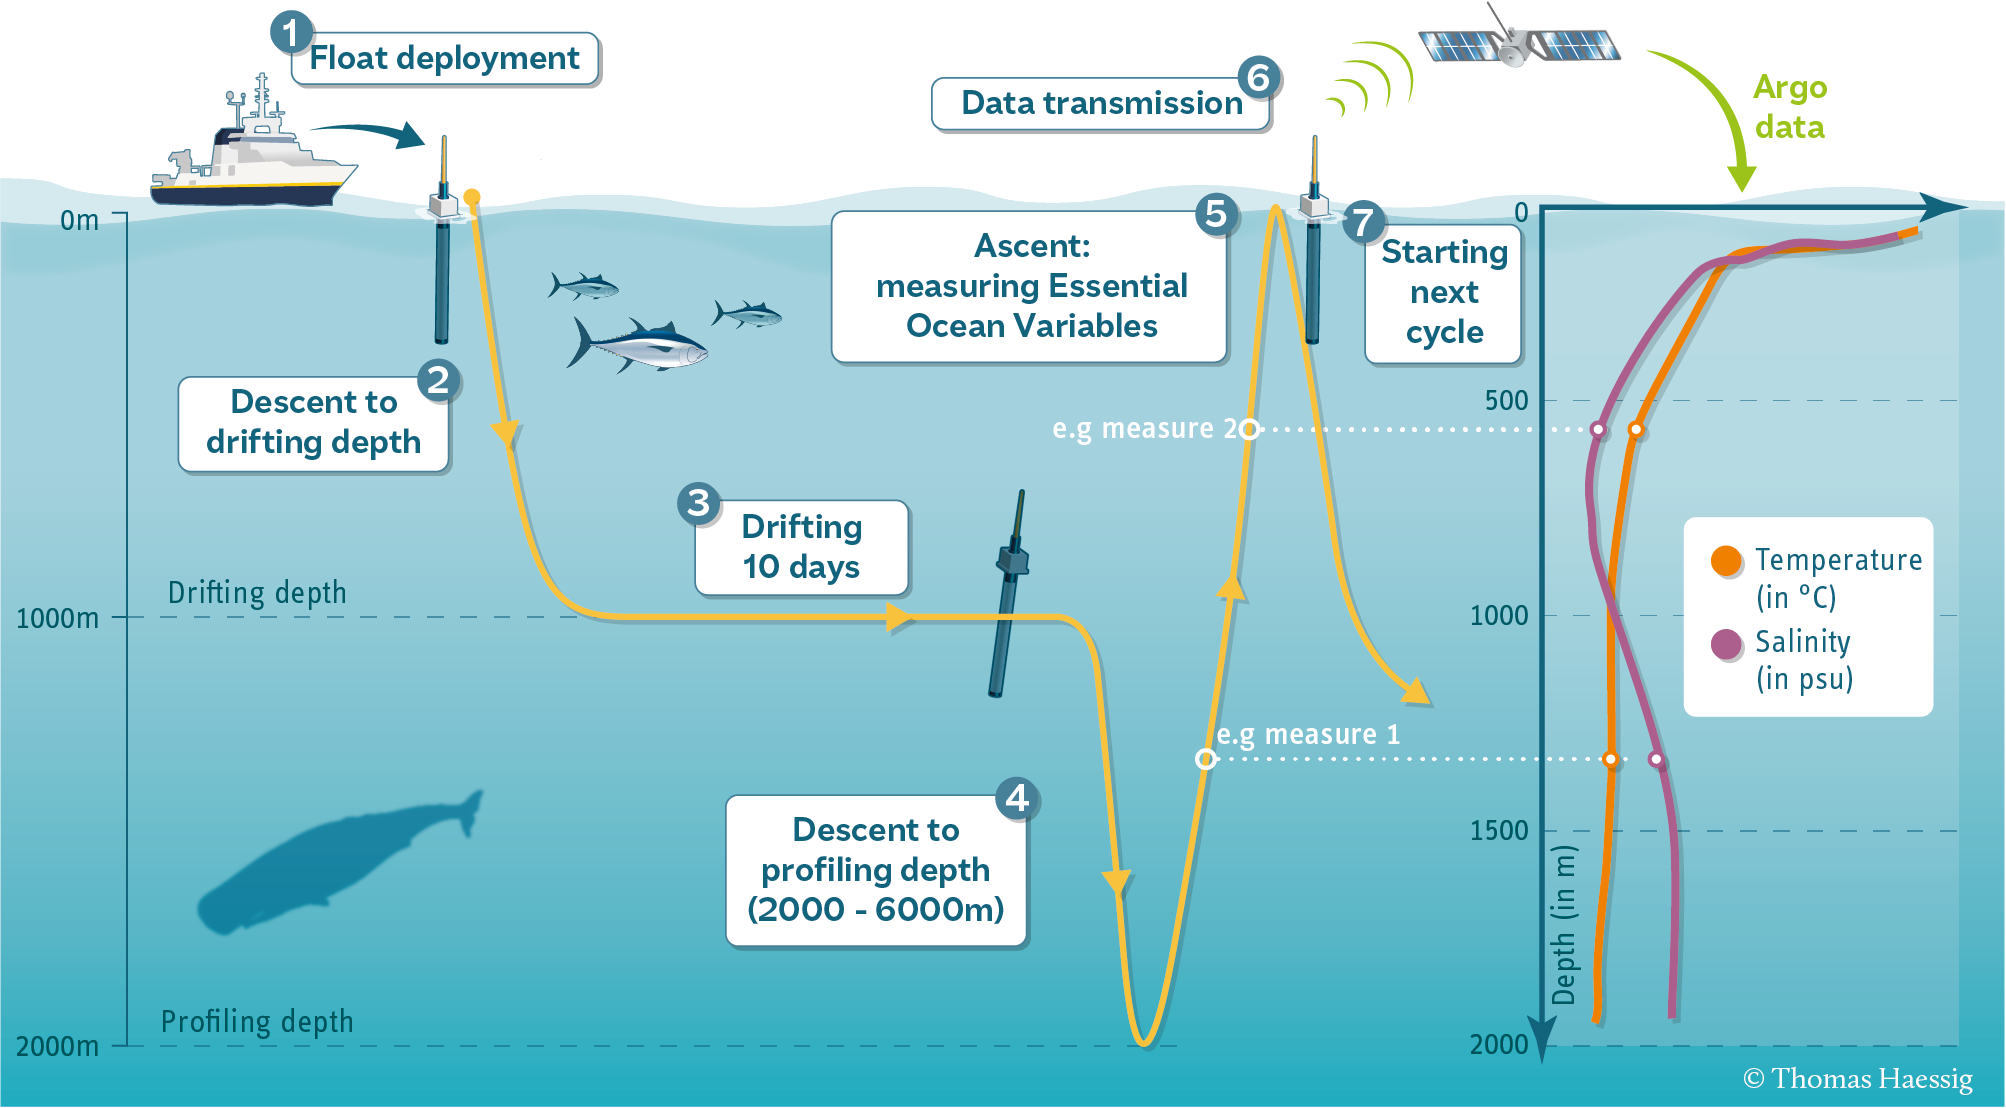


Chaque profil est associé à une latitude, une longitude et une date, ainsi qu'à de nombreux niveaux différents.

Commençons par utiliser [pooch](https://www.fatiando.org/pooch/latest/) pour télécharger les fichiers de données dont nous avons besoin pour cet exercice. Le code suivant vous donnera une liste de fichiers `.npy` que vous pourrez ouvrir à l'étape suivante.

In [1]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [2]:
import numpy as np

**Q1) Chargez chaque fichier de données sous la forme d'un tableau `numpy`.**

Vous pouvez utiliser les noms que vous voulez pour vos tableaux, mais nous recommandons :

`T` : température

`S` : salinité

`P` : pression

`date` : date

`lat` : latitude

`lon` : longitude

`level` : niveau de profondeur

Astuce 1 : Regardez le nom du fichier (les éléments dans `files`) pour savoir quel fichier correspond à quelle variable.

Astuce 2 : Consultez la documentation de [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Affichez les noms des éléments des fichiers ici

In [9]:
np.load(files[1])

array(['2012-07-13T22:33:06.019200000', '2012-07-23T22:54:59.990400000',
       '2012-08-02T22:55:52.003200000', '2012-08-12T23:08:59.971200000',
       '2012-08-22T23:29:01.968000000', '2012-09-01T23:17:38.976000000',
       '2012-09-12T02:59:18.960000000', '2012-09-21T23:18:37.036800000',
       '2012-10-02T03:00:17.971200000', '2012-10-11T23:13:27.984000000',
       '2012-10-22T02:50:32.006400000', '2012-10-31T23:36:39.974400000',
       '2012-11-11T02:40:46.041600000', '2012-11-20T23:08:29.990400000',
       '2012-12-01T02:47:51.993600000', '2012-12-10T23:23:16.972800000',
       '2012-12-21T02:58:48.979200000', '2012-12-30T23:07:23.030400000',
       '2013-01-10T02:56:43.008000000', '2013-01-19T23:24:26.956800000',
       '2013-01-30T02:43:53.011200000', '2013-02-08T23:15:27.043200000',
       '2013-02-19T01:12:50.976000000', '2013-02-28T23:07:13.008000000',
       '2013-03-11T02:43:30.979200000', '2013-03-20T23:17:22.992000000',
       '2013-03-31T01:50:38.025600000', '2013-04-09

Ensuite, chargez les fichiers sous forme de tableaux `numpy`, par exemple en utilisant la compréhension de liste

In [26]:
#@title Code à compléter (au besoin)
P,date,lat,S,level,lon,T = [np.load(files[i]) for i in range(7)]

**Q2) Recréez le tableau `level` en utilisant `np.arange` et `np.linspace`**.

Conseils :

* La documentation de `np.arange` est [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
* La documentation pour `np.linspace` est [à ce lien](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
* La documentation pour `np.testing.assert_equal` est [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Affichez le tableau `level` (niveau)

In [ ]:
___

Recréez le tableau `level` en utilisant `np.arange` et l'appeler `level_arange`

In [31]:
#@title Code à compléter (au besoin)
level_arange = np.arange(0,78)

Vérifiez que `level` et `level_arange` sont égaux en utilisant `np.testing.assert_equal`

In [33]:
np.testing.assert_equal(level,level_arange)

In [ ]:
#@title Code à compléter (au besoin)
np.___.___(___,level_arange)

Recréer le tableau `level` en utilisant `np.linspace` et l'appeler `level_linspace`

In [38]:
#@title Code à compléter (au besoin)
level_linspace = np.linspace(0,77,78)

Vérifiez que `level` et `level_linspace` sont égaux en utilisant `np.testing.assert_equal`

In [39]:
np.testing.assert_equal(level,level_linspace)

In [ ]:
#@title Code à compléter (au besoin)
___.___(___,___)

**Q3) Examinez les formes de `T`, `S` et `P` par rapport à `lon`, `lat`, `date` et `niveau`. Comment pensez-vous qu'ils sont liés ?**

Indice : consultez la sous-section [NDArrays](#NDArrays)

Affichez les formes de toutes les variables chargées

In [49]:
print(T.shape)
print(S.shape)
print(P.shape)
print(lon.shape)
print(lat.shape)
print(date.shape)
print(level.shape)
T

(78, 75)
(78, 75)
(78, 75)
(75,)
(75,)
(75,)
(78,)


array([[18.97400093, 18.43700027, 19.09900093, ..., 19.11300087,
        21.82299995, 20.13100052],
       [18.74099922, 18.39999962, 19.08200073, ..., 18.47200012,
        19.45999908, 20.125     ],
       [18.37000084, 18.37400055, 19.06500053, ..., 18.22999954,
        19.26199913, 20.07699966],
       ...,
       [ 3.79299998,  3.81399989,  3.80200005, ...,  3.80699992,
         3.81100011,  3.8599999 ],
       [ 3.76399994,  3.77800012,  3.75699997, ...,  3.75399995,
         3.74600005,  3.80599999],
       [ 3.74399996,  3.74600005,  3.7249999 , ...,         nan,
         3.71399999,         nan]])

In [45]:
#@title Code à compléter (au besoin)



(78, 75)

D'après les formes, quelles sont les dimensions partagées entre les tableaux ? Il y a plusieurs mesures faites par jour et par endroit pour chaque niveau de profondeur

**Q4) En vous basant sur la formule ci-dessous, calculez la densité de l'eau de mer `relative_density`, par rapport à l'eau pure, en fonction de la température, de la salinité et de la pression.**

`densité_relative`$ = ρ -ρ_{Eau pure} = a \times S +b \times \Theta + c \times \Theta^{2}$

où :

* Les densités $\rho$ et $ρ_{Pure\ eau}$ sont exprimées en unités $kg/m^{3}$.
* Les constantes $a$, $b$ et $c$ sont fournies ci-dessous.
* La fonction permettant de calculer la température conservative $\Theta$ (en unités Celcius) à partir de la température, de la salinité et de la pression est fournie ci-dessous.
* La température $T$ est exprimée en unités Celcius.
* La salinité $S$ est exprimée en unités $g/kg$.
* La pression $p$ est exprimée en unités $dbar$.

Astuce : Les tableaux `numpy` chargés `temperature`, `salinity`, et `pressure` ont déjà les bonnes unités et aucune conversion n'est nécessaire.

Sources :

1) [*Roquet, Fabien, et al. "Defining a simplified yet "realistic" equation of state for seawater." Journal of Physical Oceanography 45.10 (2015) : 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). (Licence)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Voici les constantes a, b et c :

In [53]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Importons la bibliothèque [`gsw`] (https://teos-10.github.io/GSW-Python/) qui contient la fonction `CS_from_t` pour calculer la température conservative $\Theta$ à partir de la température, de la salinité et de la pression.

In [50]:
!pip install gsw
from gsw import CT_from_t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.6 MB/s eta 0:00:00


Maintenant, c'est à vous de jouer. Voici l'équation pour éviter d'avoir à faire défiler la page vers le haut :

`densité_relative`$ = ρ -ρ_{Pure\ Eau} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculeuz la température conservatrice

Conseil : utilisez [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [51]:
#@title Code à compléter (au besoin)
TC = CT_from_t(S,T,P)

Calculez la "densité relative" à l'aide de l'équation ci-dessus.

In [54]:
D_relative = a*S+b*TC+c*TC**2

In [ ]:
#@title Code à compléter (au besoin)
___ = ___

**Q4) Faites un graphique pour chaque colonne de données dans `T`, `S`, `P`, et
`densité_relative` (quatre plots)**

Pour cette question, nous devons utiliser l'interface [Pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de la bibliothèque [Matplotlib](https://matplotlib.org/) pour la visualisation, même si nous ne l'avons pas encore étudiée en profondeur en classe. Mais n'ayez crainte, nous vous fournissons des instructions faciles à suivre ci-dessous. 😊

La première étape consiste à importer Pyplot. Il suffit d'exécuter le code ci-dessous.

In [55]:
import matplotlib.pyplot as plt

Ensuite, nous tracerons les variables en fonction de la profondeur de l'océan, `level`. Il suffit de lire la documentation [sur ce lien] (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) pour en déduire la syntaxe correcte. Etiquetez vos axes en utilisant `plt.xlabel` et `plt.ylabel`, et ajoutez un titre en utilisant `plt.title`.

Astuce : L'échelle verticale doit utiliser les données `level` pour être cohérente avec les conventions océanographiques.

Conseil 2 : Chaque graphique doit avoir une ligne pour chaque colonne de données. Le résultat sera désordonné, comme dans le graphique ci-dessous :

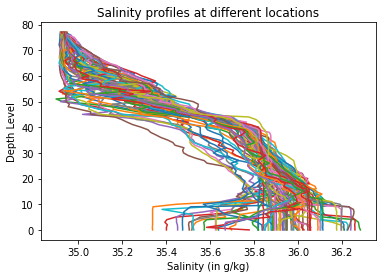

Text(0.5, 1.0, 'Evolution de la température au cours de la profondeur')

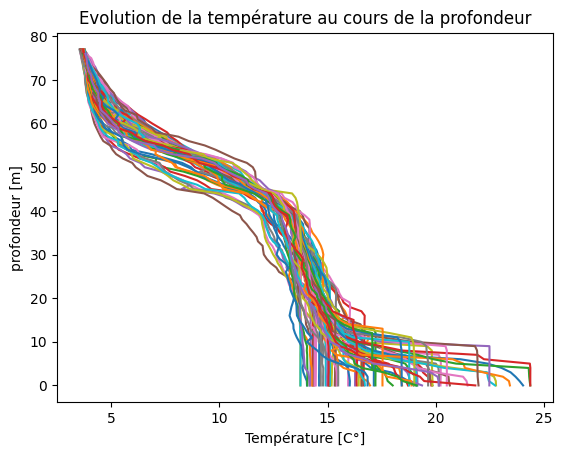

In [57]:
plt.plot(T,level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel('Température [C°]') # Prend une chaîne de caractères comme argument
plt.ylabel('profondeur [m]')
plt.title("Evolution de la température au cours de la profondeur")

Faites plus de plots ci-dessous:

Text(0.5, 1.0, 'Evolution de la salinité en fonction de la profondeur')

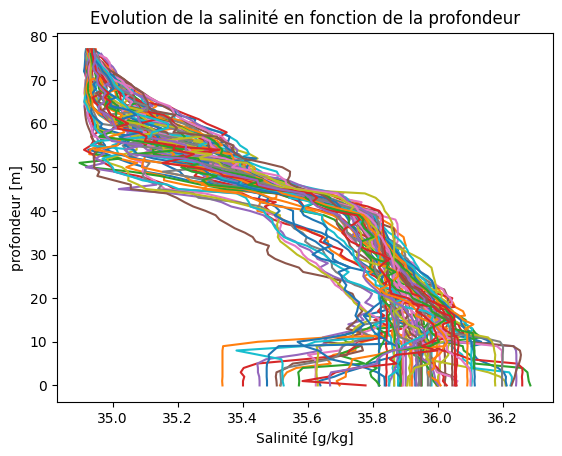

In [59]:
plt.plot(S,level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel('Salinité [g/kg]') # Prend une chaîne de caractères comme argument
plt.ylabel('profondeur [m]')
plt.title("Evolution de la salinité en fonction de la profondeur")

Text(0.5, 1.0, 'Evolution de la pression en fonction de la profondeur')

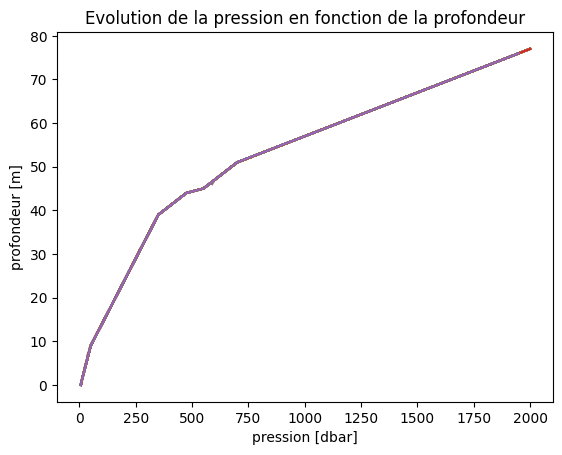

In [60]:
plt.plot(P,level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel('pression [dbar]') # Prend une chaîne de caractères comme argument
plt.ylabel('profondeur [m]')
plt.title("Evolution de la pression en fonction de la profondeur")

Text(0.5, 1.0, 'Evolution de la densité relative en fonction de la profondeur')

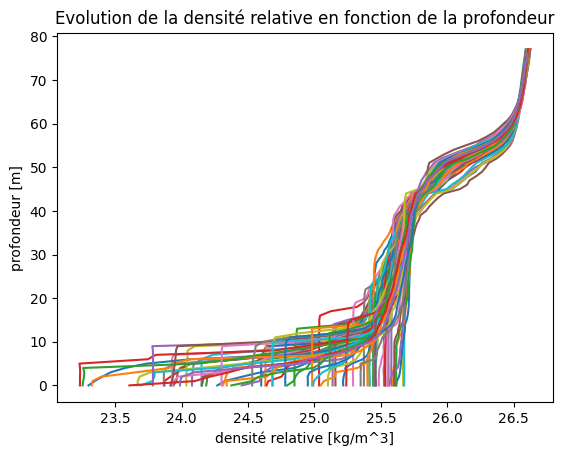

In [62]:
plt.plot(D_relative,level) ; # Le point-virgule empêche l'impression des objets de ligne
plt.xlabel('densité relative [kg/m^3]') # Prend une chaîne de caractères comme argument
plt.ylabel('profondeur [m]')
plt.title("Evolution de la densité relative en fonction de la profondeur")

**Q5) Calculez la moyenne et l'écart-type de `T`, `S`, `P`, et `seawater_density` à chaque profondeur dans `level`.

Conseil : Vous pouvez lire la documentation sur [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) et [ce lien](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Conseil 2 : Vous pouvez vérifier que vous avez pris la moyenne et les écarts types le long des axes corrects en vérifiant la "forme" de vos résultats.

Calculez les moyennes...

In [80]:
P.shape

(78, 75)

In [87]:
#@title Code à compléter (au besoin)
T_moy = np.mean(T,axis=1)
S_moy = np.mean(S,axis=1)
P_moy = np.mean(P,axis=1)
D_moy = np.mean(D_relative,axis=1)

... et les écarts types.

In [78]:
T_std = np.std(T,axis=1)
S_std = np.std(S,axis=1)
P_std = np.std(P,axis=1)
D_std = np.std(D_relative,axis=1)

In [ ]:
#@title Code à compléter (au besoin)
___ = ___.___(___,___)

Vérifiez qu'elles ont la même forme que vos coordonnées de niveau vertical `lev` :

In [73]:
#@title Code à compléter (au besoin)
np.testing.assert_equal(T_std.shape,level.shape)

**Q6) Faites maintenant des tracés similaires, mais ne montrez que les moyennes `T`, `S`, `P`, et `densité_de_l'eau_de_mer` à chaque profondeur. Faites apparaître les barres d'erreur sur chaque graphique en utilisant les écarts-types**.

Astuce : Si vous vous sentez aventureux, vous pouvez utiliser directement la fonction [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html).

Astuce 2 : Vous devriez obtenir des graphiques similaires à celui ci-dessous

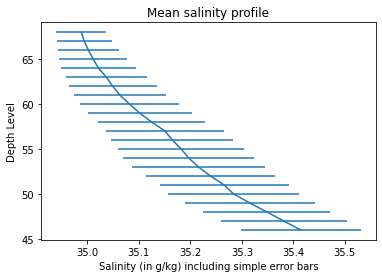

Text(0.5, 1.0, 'T moyenne en fonction de profondeur')

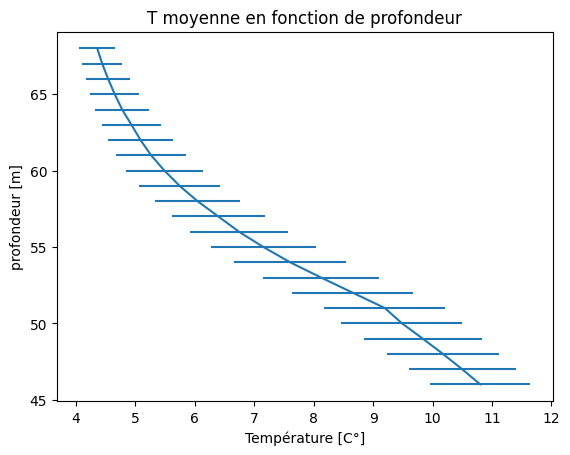

In [75]:
plt.errorbar(T_moy,level,xerr=T_std)
plt.xlabel('Température [C°]')
plt.ylabel('profondeur [m]')
plt.title('T moyenne en fonction de profondeur')

Encore trois plots et nous serons prêts 🙂 .

Text(0.5, 1.0, 'S moyenne en fonction de profondeur')

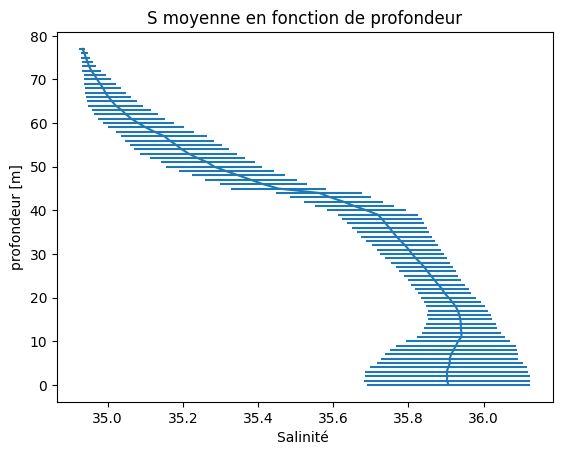

In [92]:
plt.errorbar(S_moy,level,xerr=S_std)
plt.xlabel('Salinité ')
plt.ylabel('profondeur [m]')
plt.title('S moyenne en fonction de profondeur')

Text(0.5, 1.0, 'P moyenne en fonction de profondeur')

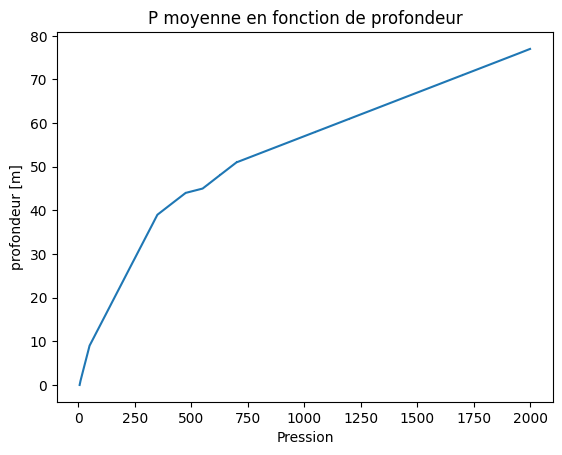

In [91]:
plt.errorbar(P_moy,level, xerr = P_std)
plt.xlabel('Pression')
plt.ylabel('profondeur [m]')
plt.title('P moyenne en fonction de profondeur')

Text(0.5, 1.0, 'P moyenne en fonction de profondeur')

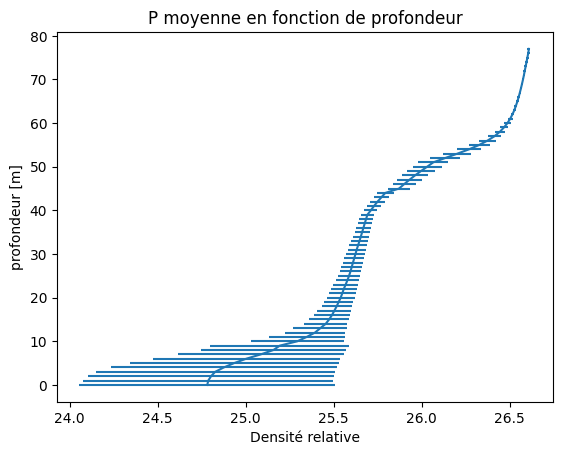

In [90]:
plt.errorbar(D_moy,level, xerr = D_std)
plt.xlabel('Densité relative')
plt.ylabel('profondeur [m]')
plt.title('P moyenne en fonction de profondeur')

**Q7) Prise en compte des données manquantes**

Les profils contiennent de nombreuses valeurs manquantes. Celles-ci sont indiquées par la valeur spéciale "Not a Number", ou `np.nan`.

Lorsque vous prenez la moyenne ou l'écart type des données contenant des NaN, le résultat entier devient `NaN`. Au lieu de cela, si vous utilisez les fonctions spéciales `np.nanmean` et `np.nanstd`, vous dites à NumPy d'ignorer les NaN.

Recalculez les moyennes et les écarts types comme dans les sections précédentes en utilisant ces fonctions et tracez les résultats.

Conseil : Liens vers la documentation [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) et la documentation [`np.nanstd`](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculez les moyennes ci-dessous en ignorant les valeurs manquantes. Nous espérons que vous pouvez maintenant trouver la syntaxe complète vous-même 😎

In [88]:
T_moy = np.nanmean(T,axis=1)
S_moy = np.nanmean(S,axis=1)
P_moy = np.nanmean(P,axis=1)
D_moy = np.nanmean(D_relative,axis=1)

De même, recalculez les écarts types en ignorant les valeurs manquantes.

In [89]:
T_std = np.nanstd(T,axis=1)
S_std = np.nanstd(S,axis=1)
P_std = np.nanstd(P,axis=1)
D_std = np.nanstd(D_relative,axis=1)

**Q8) Créez un diagramme de dispersion des coordonnées longitudinales (`lon`) et latitudinales (`lat`) des flotteurs ARGO.**

Encore une fois, nous n'en avons pas parlé dans le tutoriel, mais il existe une fonction de diagramme de dispersion très pratique appelée [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) fournie par l'interface Pyplot.

Bonus : Etiqueter votre figure en utilisant `plt.xlabel`, `plt.ylabel`, et `plt.title`.

Bonus 2 : Augmentez la taille de police de vos étiquettes en ajoutant un argument `fontsize=` aux fonctions d'étiquettes.

Bonus 3 : Rendez votre diagramme de dispersion plus beau en changeant les arguments de [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listés dans la documentation, par exemple `s=`.

Text(0.5, 1.0, 'Diagramme de dispersion des points')

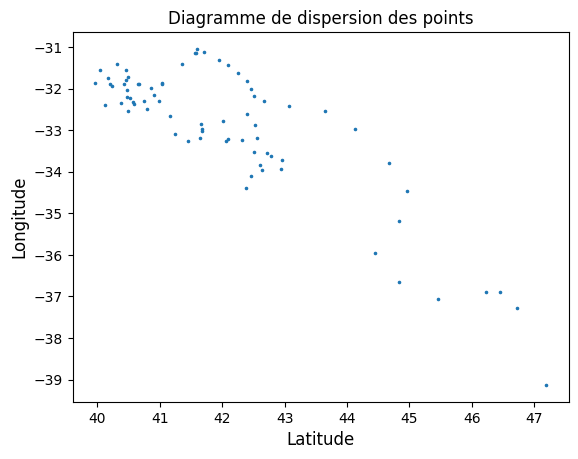

In [96]:
plt.scatter(lat,lon, s=2.5)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude',fontsize=12)
plt.title('Diagramme de dispersion des points')

In [ ]:
#@title Code à compléter (au besoin)
plt.scatter(___,___)
___ # Bonus
___ # Plus de bonus

## Fonctions

**Q1) Ecrivez une fonction pour convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$, la masse de la Terre**.

Par exemple, la masse de Jupiter est :

$M_{Jupiter} \approx 1898\times10^{24}kg \approx 318 M_{Terre}$

In [97]:
planetdict = {'mercure':0.330,'vénus':4.87,'terre':5.97,
              'mars':0.642,'jupiter':1898,'saturne':568,'uranus':86.8,'nepturne':102, 'pluto':0.013}

# unit: 10^24 kg

In [ ]:
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])

# Testez que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183


In [98]:
#@title Code à compléter (au besoin)
# Ecrivez votre fonction ici
# La fonction doit prendre la masse de la planète que vous voulez (par exemple, planetdict['mars']) et la diviser par la masse de la Terre.
# (planetdict['terre'])
def convert_mass_Mterre(masse):
  return masse/planetdict['terre']

#tester que cela fonctionne pour jupiter (planetdict['jupiter']), la fonction devrait retourner 317.92294807370183
convert_mass_Mterre(planetdict['jupiter'])

317.92294807370183

**Q2) Ecrivez maintenant une fonction unique qui peut convertir l'unité que vous avez choisie pour les masses planétaires en $M_{Terre}$ ou $M_{Jupiter}$ selon le mot-clé que vous avez spécifié**.

In [ ]:
# Écrivez votre fonction ici

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)

In [102]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def convert_m_Mterrejupiter(mass,ourplanet) :
  return mass/planetdict[ourplanet]

# Vérifiez que votre fonction fonctionne : convertissez Mjupiter en Mterre et Mjupiter,
# Vous devriez voir 317.923 (Mterre) et 1.0 (Mjupiter)
print(convert_m_Mterrejupiter(planetdict['jupiter'],'terre'),convert_m_Mterrejupiter(planetdict['jupiter'],'jupiter'))

317.92294807370183 1.0


In [101]:
# Stocker le Mjupiter pour Q3
Mjupiter = convert_m_Mterrejupiter(planetdict['jupiter'], 'jupiter')

**Q3) Ecrivez une fonction qui prend un argument (la masse en $M_{Jupiter}$) et renvoie deux arguments (la masse en $M_{Terre}$ et la masse dans l'unité que vous avez choisie [la planète que vous voulez]).

In [ ]:
# Écrivez votre fonction ici
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)

In [103]:
#@title Code à compléter (au besoin)
# Écrivez votre fonction ici
def mass_conversion_two_arguments(mass,planet) :
  a = mass/planetdict['terre'] # Terre
  b = mass/planetdict[planet] # La planète que vous voulez utiliser comme référence
  return a,b
# Vérifiez que la conversion de la masse de Jupiter en $M_{Terre}$ et en $M_{Terre}$ fonctionne.
# l'unité choisie (par exemple, la planète Mars)
print(mass_conversion_two_arguments(planetdict['jupiter'],'mars'))

(317.92294807370183, 2956.386292834891)


In [ ]:
# Bonus : Utilisez la fonction de Q10 pour convertir la masse de Neptune en $M_{Jupiter}$.
# puis la fonction de Q3 pour la reconvertir dans l'unité que vous avez choisie
# Retrouvez-vous la valeur originale ?